# Proyecto 3
Estuardo Díaz 16110

In [1]:
import numpy as np
from scipy import linalg
import matplotlib
import matplotlib.pyplot as plt

### Algoritmos a utilizar:

In [70]:
def GaussSeidel(A,b,x0,N=100,tol=0.000001):
    for k in range(N):
        print(k,": ",x0)
        x = np.zeros_like(x0)
        for i in range(A.shape[0]):
            x[i] = (b[i] - sum(A[i, :i]*x[:i]) - sum(A[i, i + 1:]*x0[i + 1:])) / A[i, i]
        if np.allclose(x0, x, rtol=tol):
            return x
        x0 = x
    print("Se excedió el número máximo de iteraciones")
    return x

## a) Matriz mal condicionada

Definimos la **condición** de $A$ como $cond(A) := ||A||\cdot ||A^{-1}||$

In [71]:
def cond(A):
    inv_A = linalg.inv(A)
    return linalg.norm(A)*linalg.norm(inv_A)

Consideremos la matriz $H$ mal condicionada siguiente:

La matriz de Hilbert es una matriz $H$ de $n\times n$ cuyas entradas están dadas por $$H_{ij} = \frac{1}{i+j-1}$$  

In [72]:
def getHilbertMatrix(n = 5):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i,j] = 1/(i+j+1)
    return H


In [73]:
H = getHilbertMatrix()
H

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

In [74]:
print("cond(H): ",cond(H))

cond(H):  480849.1169946837


Como la condición de $H$ es muy grande, sabemos que la matriz es mal condicionada. Por lo tanto, la factorización no es buena. Sin embargo, podemos utilizar el método de Gauss-Seidel para resolver un sistema $Hx=y$. Sea $y = [1,2,3,4,5]$

In [75]:
y = np.array([1,2,3,4,5])
x = np.transpose(GaussSeidel(H,y,np.zeros(len(y))))
print("x:\n",x)

0 :  [0. 0. 0. 0. 0.]
1 :  [ 1.          4.5         7.70833333 10.95694444 14.21272321]
2 :  [-9.4012252   0.64005952 10.58590207 18.76970887 26.23574807]
3 :  [-12.78824062  -7.13676499  10.85344648  24.75225827  36.92325885]
4 :  [-12.62214934 -16.51984524   9.6860839   29.60826196  46.73680551]
5 :  [-10.71819861 -26.32062495   7.70746139  33.71897938  55.9302499 ]
6 :  [ -8.02463615 -35.9401544    5.25025859  37.29505906  64.64730274]
7 :  [ -5.03323431 -45.08852929   2.49352476  40.45659893  72.97298149]
8 :  [ -1.99565631 -53.63710921  -0.46491029  43.27538797  80.96077551]
9 :  [  0.96252261 -61.54072173  -3.57025085  45.79720995  88.64700323]
10 :  [  3.78174135 -68.79675147  -6.79059256  48.05363485  96.05841543]
11 :  [  6.43681479 -75.42366639 -10.10629125  50.06826669 103.21623597]
12 :  [  8.92028308 -81.44978418 -13.50434665  51.86006708 110.13832267]
13 :  [ 11.23365967 -86.9074311  -16.97543029  53.44513545 116.84033509]
14 :  [ 13.38284143 -91.82993825 -20.51230799  5

Verificamos la solución

In [68]:
print("y - Hx:")
print(y-H.dot(x))

y - Hx:
[-2.79597717e-01  6.62687379e-01 -1.98320369e-01 -3.69104231e-01
 -3.55271368e-15]


Notamos que la solución no es muy exacta, y el algoritmo tarda mucho en converger

## b) Matriz de insumo producto

La matriz de insumo-producto es una matriz que representa las compras y ventas de varios sectores de economía y se utilizan para predecir demanda o la producción que se requiere para satisfacer la demanda.

En este ejemplo, $A$ es la matriz de insumo producto sobre los sectores de Agricultura, Industria y Servicios. La variable $y$ representa la demanda y queremos calcular $x$, la producción bruta.
\begin{align}
x &= Ax + y \\
x - Ax &= y \\
x(I - A) &= y\\
x &= (I-A)^{-1}y
\end{align}

In [56]:
A = np.array([[0.2, 0.1, 0.2],[0.5, 0.2, 0.1],[0.3, 0.7, 0.1]])
print("A:\n",A)

A:
 [[0.2 0.1 0.2]
 [0.5 0.2 0.1]
 [0.3 0.7 0.1]]


In [57]:
y = np.array([600,1000,700])
print("y:\n",y)

y:
 [ 600 1000  700]


Llamamos la la matriz $(I-A)$ la matriz de Leontief y $(I-A)^{-1}$ la matriz inversa de Leontief

In [58]:
Leontief = np.identity(3)- A
print("Matriz de Leontief:\n", Leontief)
invLeontief = linalg.inv(Leontief)
print("Matriz inversa de Leontief:\n", invLeontief)

Matriz de Leontief:
 [[ 0.8 -0.1 -0.2]
 [-0.5  0.8 -0.1]
 [-0.3 -0.7  0.9]]
Matriz inversa de Leontief:
 [[1.83615819 0.64971751 0.48022599]
 [1.3559322  1.86440678 0.50847458]
 [1.66666667 1.66666667 1.66666667]]


Sin embargo no es necesario encontrar la inversa, podemos utilizar el método de Gauss-Seidel para encontrar la solucion

Encontramos $x$ usando el sistema $(I-A)x = y$

In [59]:
I = np.identity(len(y))
x = np.transpose(GaussSeidel(I-A,y,np.zeros(len(y))))
print("x:\n",x)

0 :  [0. 0. 0.]
1 :  [ 750.         1718.75       2364.58333333]
2 :  [1555.98958333 2518.06640625 3254.93706597]
3 :  [1878.49256727 2830.92498779 3605.77251293]
4 :  [2005.30875171 2954.03953393 3743.80033252]
5 :  [2055.20502487 3002.47818211 3798.10692771]
6 :  [2074.83650469 3021.5361814  3819.47364265]
7 :  [2082.56043334 3029.03447617 3827.88029257]
8 :  [2085.59938266 3031.98465074 3831.18785591]
9 :  [2086.79504532 3033.14538531 3832.48920368]
10 :  [2087.26547408 3033.60207176 3833.00121384]
11 :  [2087.45056243 3033.78175325 3833.20266223]
12 :  [2087.52338471 3033.85244822 3833.2819213 ]
13 :  [2087.55203635 3033.88026288 3833.31310547]
14 :  [2087.56330923 3033.89120645 3833.32537476]
15 :  [2087.5677445  3033.89551216 3833.33020206]
x:
 [2087.56948954 3033.89720622 3833.33210135]


Notamos que la solución es efectivamente correcta

In [60]:
print("x - (Ax+y):")
print(x-(A.dot(x)+y))

x - (Ax+y):
[-0.00054926 -0.00018993  0.        ]


## c) Regresión múltiple

Podemos utilizar regrecion lineal multiple para encontrar una recta que representa el comportamiento de un conjunto de datos.

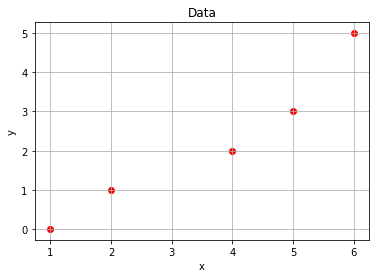

In [61]:
x = np.array([1,2,4,5,6])
y = np.array([0,1,2,3,5])
# Plot
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')

ax.set(xlabel='x', ylabel='y',
       title='Data')
ax.grid()
plt.show()

Suponemos que los datos siguen un comportamiento lineal, entonces definimos las ecuaciones
\begin{align}
Ax &= b\\
A^TA \hat{x} &= A^Tb
\end{align}
Donde $A$ esta dado por $A = \binom{x}{1}$. Entonces si encontramos la inversa de $A^TA$ el problema se reduce a resolver un sistema de la forma $Ax=b$.

In [62]:
A = np.transpose(np.array([x,np.ones(len(x))]))
print("A:\n",A)
ATA = np.transpose(A).dot(A)
print("ATA:\n",ATA)
ATb = np.transpose(A).dot(np.transpose(y))
print("ATb\n:",ATb)

A:
 [[1. 1.]
 [2. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]]
ATA:
 [[82. 18.]
 [18.  5.]]
ATb
: [55. 11.]


Utilizamos el metodo de Gauss-Seidel para encontrar la solución y resolver el sistema de ecuaciones. Con esto obtenemos los parametros de la recta que mejor se ajustan a nuestros datos.

0 :  [0. 0.]
1 :  [ 0.67073171 -0.21463415]
2 :  [ 0.71784652 -0.38424747]
3 :  [ 0.75507871 -0.51828337]
4 :  [ 0.78450123 -0.62420442]
5 :  [ 0.80775219 -0.70790788]
6 :  [ 0.82612612 -0.77405403]
7 :  [ 0.84064601 -0.82632563]
8 :  [ 0.85212026 -0.86763293]
9 :  [ 0.86118772 -0.90027578]
10 :  [ 0.86835322 -0.92607159]
11 :  [ 0.87401572 -0.94645658]
12 :  [ 0.87849047 -0.96256568]
13 :  [ 0.88202661 -0.97529581]
14 :  [ 0.88482103 -0.98535571]
15 :  [ 0.8870293  -0.99330549]
16 :  [ 0.88877438 -0.99958775]
17 :  [ 0.89015341 -1.00455227]
18 :  [ 0.89124318 -1.00847545]
19 :  [ 0.89210437 -1.01157573]
20 :  [ 0.89278492 -1.0140257 ]
21 :  [ 0.89332271 -1.01596177]
22 :  [ 0.89374771 -1.01749174]
23 :  [ 0.89408355 -1.01870079]
24 :  [ 0.89434895 -1.01965623]
25 :  [ 0.89455869 -1.02041127]
26 :  [ 0.89472442 -1.02100793]
27 :  [ 0.8948554  -1.02147944]
28 :  [ 0.8949589  -1.02185204]
29 :  [ 0.89504069 -1.02214649]
30 :  [ 0.89510533 -1.02237918]
31 :  [ 0.89515641 -1.02256306]
32 :

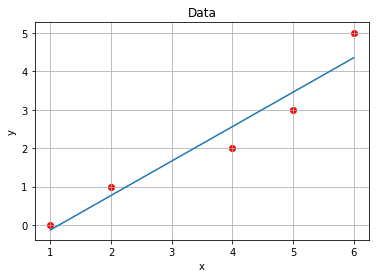

In [63]:
sol = np.transpose(GaussSeidel(ATA,ATb,np.zeros(len(ATb))))
m = sol[0]
b = sol[1]

fig, ax = plt.subplots()
ax.scatter(x, y, color = 'red')
l = np.linspace(min(x),max(x),100)
ax.plot(l,m*l+b )
ax.set(xlabel='x', ylabel='y',
       title='Data')
ax.grid()
plt.show()

### Referencias
* Weisstein, Eric W. "Hilbert Matrix." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/HilbertMatrix.html
* Prof. Waldo Marquez González, "La Matriz de Leontief", EL PROBLEMA ECONOMICO DE LAS RELACIONES INTERINDUSTRIALES. http://www.ehu.eus/Jarriola/Docencia/EcoEsp/matriz-de-leontief.pdf
* Dr. Peyam, Linear regression. https://www.youtube.com/watch?v=-bgrezOT0VQ